In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data=pd.read_csv("Fraud.csv")
data.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


# Data Preprocessing  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.shape

(6362620, 11)

In [5]:
data[data['nameDest'].str.startswith('M')]['isFraud'].sum()

0

In [6]:
data[data['nameDest'].str.startswith('M')]['newbalanceDest'].sum()

0.0

In [7]:
data[data['nameDest'].str.startswith('M')]['oldbalanceDest'].sum()

0.0

Missing Values 

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Duplicated Values

In [10]:
data.duplicated().sum()

0

In [11]:
data1 = data[data["nameDest"].str.startswith("M") == False]
data1.shape

(4211125, 11)

In [12]:
data1.groupby('nameDest').value_counts()

nameDest     step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
C1000004082  352   CASH_IN   156985.31   C1180747031  36186.00       193171.31       0.00            0.00            0        0                 1
             354   CASH_OUT  228252.33   C1978911345  953.00         0.00            0.00            228252.33       0        0                 1
             370   TRANSFER  1331742.99  C1539355936  11088.00       0.00            228252.33       1559995.31      0        0                 1
             374   CASH_OUT  363030.74   C1680720313  19486.00       0.00            1559995.31      1923026.06      0        0                 1
             379   CASH_IN   156015.83   C1185840905  55451.00       211466.83       1923026.06      1767010.23      0        0                 1
                                                                                                                                 

In [13]:
data1.nunique()

step                  743
type                    4
amount            4008584
nameOrig          4207035
oldbalanceOrg     1335571
newbalanceOrig    1693410
nameDest           571961
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [14]:
data1[data1["type"].str.startswith("D")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.00,0.00,0,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362247,718,DEBIT,2063.08,C397492133,328612.0,326548.92,C1557979171,1312720.98,1314784.06,0,0
6362254,718,DEBIT,425.65,C1835928822,4046.0,3620.35,C701975669,3009282.73,3009708.38,0,0
6362282,718,DEBIT,1636.03,C761454361,83120.0,81483.97,C355970563,8393318.02,8394954.05,0,0
6362303,718,DEBIT,2148.99,C1909103796,49632.0,47483.01,C1931871221,66241.39,68390.38,0,0


In [15]:
data1[data1["type"].str.endswith("N")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362253,718,CASH_IN,188888.89,C1459052107,51838.00,240726.89,C1955750585,0.00,0.00,0,0
6362271,718,CASH_IN,27919.60,C562982749,2413.00,30332.60,C240654881,512791.59,484871.98,0,0
6362279,718,CASH_IN,78988.38,C886862695,204464.00,283452.38,C262804200,108724.19,29735.81,0,0
6362298,718,CASH_IN,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0,0


In [16]:
"""Don't have any frauds in cash_in and debit type of transactions so we are going to delete this """

"Don't have any frauds in cash_in and debit type of transactions so we are going to delete this "

In [17]:
data2=data1[data1['type'].str.endswith('N')==False]
data2.shape


(2811841, 11)

In [18]:
data2=data2[data2['type'].str.startswith('D')==False]
data2.shape

(2770409, 11)

# EDA

OUTLIERS

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type', ylabel='amount'>

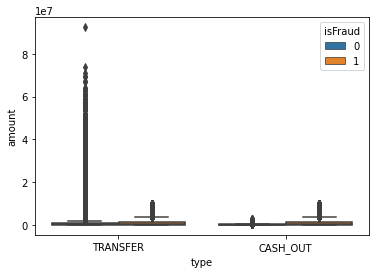

In [20]:
sns.boxplot(x=data2['type'],y=data2['amount'],hue=data2['isFraud'])

In [21]:
d=data1.corr()
d

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.028621,-0.009874,-0.010141,0.036444,0.034297,0.039035,0.004041
amount,0.028621,1.000000,-0.041776,-0.048015,0.260521,0.433038,0.073082,0.012314
oldbalanceOrg,-0.009874,-0.041776,1.000000,0.998768,0.023454,-0.003284,0.005389,0.003690
newbalanceOrig,-0.010141,-0.048015,0.998768,1.000000,0.024044,-0.004596,-0.013400,0.003628
oldbalanceDest,0.036444,0.260521,0.023454,0.024044,1.000000,0.975226,-0.012167,-0.000798
newbalanceDest,0.034297,0.433038,-0.003284,-0.004596,0.975226,1.000000,-0.005756,-0.000823
isFraud,0.039035,0.073082,0.005389,-0.013400,-0.012167,-0.005756,1.000000,0.044095
isFlaggedFraud,0.004041,0.012314,0.003690,0.003628,-0.000798,-0.000823,0.044095,1.000000


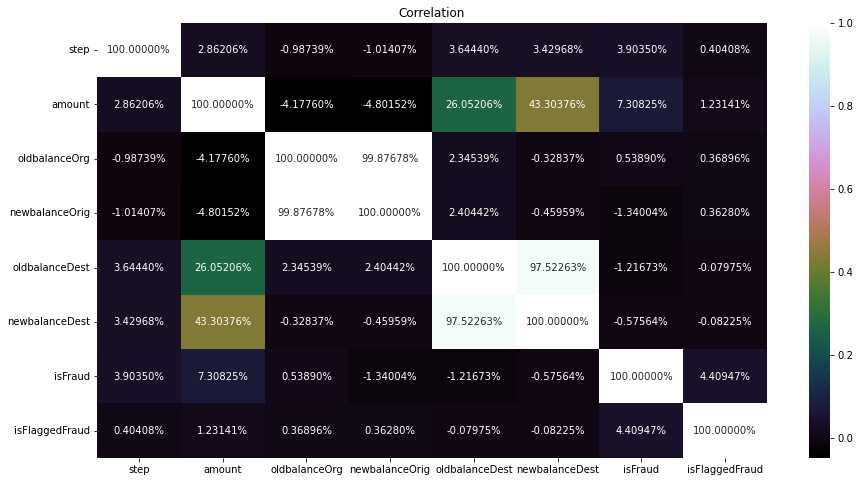

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(d,fmt='.5%',annot=True,cmap='cubehelix')
plt.title('Correlation')
plt.show()

<AxesSubplot:>

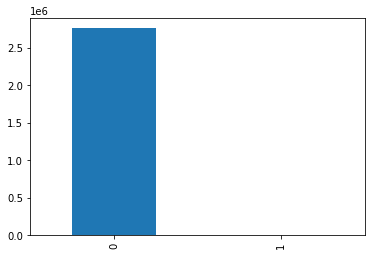

In [23]:
data2['isFraud'].value_counts().plot(kind='bar')

8213


<AxesSubplot:>

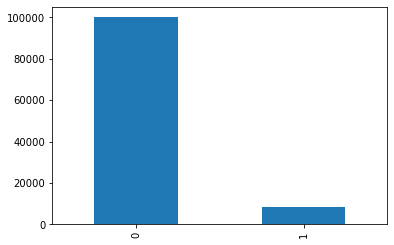

In [24]:
class1_data=data2[data2['isFraud']==1]
class0_data=data2[data2['isFraud']==0].sample(100000)
print(len(class1_data))
new_data=pd.concat([class0_data,class1_data]).reset_index(drop=True)
new_data['isFraud'].value_counts().plot(kind='bar')

In [25]:
#X=data2.drop(['type','isFraud','nameOrig','nameDest'],axis=1)
X=new_data.drop(['type','isFraud','nameOrig','nameDest'],axis=1)
#y=data2['isFraud']
Y=new_data['isFraud']
print(X.shape)
print(Y.shape)

(108213, 7)
(108213,)


# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(86570, 7) (21643, 7) (86570,) (21643,)


# Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_train_data = scale.fit_transform(X_train)

scaled_test_data = scale.transform(X_test)

# Model Building 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l2'],
    'C' :[0.001,0.01,0.1,1,10,100,1000],
    'solver' : ['lbfgs'],
    'max_iter' : [100, 200]
    }
]
logis = LogisticRegression()
clf = GridSearchCV(logis, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring='f1')

model_1_clf = clf.fit(scaled_train_data,y_train)


model_1_clf.best_estimator_
print("Tuned Logistic Regression Parameters: {}".format(model_1_clf.best_params_))
print (f'F1 Score - : {model_1_clf.score(scaled_test_data,y_test):.3f}')

model_1_y_pred = model_1_clf.predict(scaled_test_data)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Tuned Logistic Regression Parameters: {'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
F1 Score - : 0.828


# Accuracy

In [29]:
from sklearn.metrics import classification_report,roc_auc_score
print('Logistic Regression scores')
print(classification_report(y_test, model_1_y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, model_1_y_pred))

Logistic Regression scores
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20021
           1       0.93      0.75      0.83      1622

    accuracy                           0.98     21643
   macro avg       0.95      0.87      0.91     21643
weighted avg       0.98      0.98      0.98     21643

ROC AUC Score
0.8712652885863186


# Confusion Matrix

LoR Confusion matrix


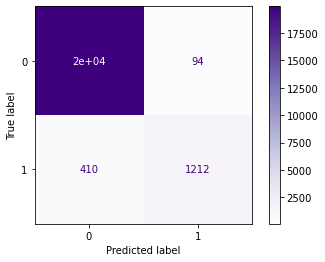

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
m_1_conf_metric =confusion_matrix(y_test, model_1_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=m_1_conf_metric)
print('LoR Confusion matrix')
disp.plot(cmap='Purples')
plt.show()

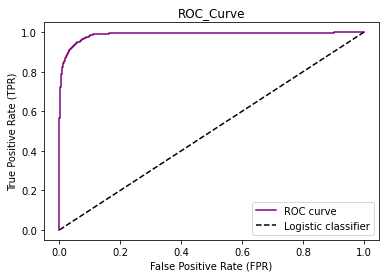

In [31]:
from sklearn.metrics import roc_curve
y_pred_prob_1 = model_1_clf.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_1)
plt.plot(fpr, tpr, label='ROC curve',color='Purple')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC_Curve')
plt.legend()
plt.show()

# Random Forest

In [32]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
# Creating the hyperparameter grid
model_2 = RandomForestClassifier(class_weight='balanced')
param_dist = {"max_depth": [7],
              "max_features": [.5,.8],
              "min_samples_leaf":[6,7],
              "criterion": ["entropy"]}
 # Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(model_2, param_dist, cv = 5,scoring='f1')
 
tree_cv.fit(scaled_train_data,y_train)
 
# Print the tuned parameters and score
print("Tuned RandomForest Parameters: {}".format(tree_cv.best_params_))
print("F1 score is {}".format(tree_cv.best_score_))

model_2_y_pred = tree_cv.predict(scaled_test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned RandomForest Parameters: {'min_samples_leaf': 6, 'max_features': 0.8, 'max_depth': 7, 'criterion': 'entropy'}
F1 score is 0.8526887699205407


In [33]:
print('Random Forest Classifier scores')
print(classification_report(y_test, model_2_y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, model_2_y_pred))

Random Forest Classifier scores
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     20021
           1       0.76      1.00      0.86      1622

    accuracy                           0.98     21643
   macro avg       0.88      0.98      0.92     21643
weighted avg       0.98      0.98      0.98     21643

ROC AUC Score
0.9849057533978964


Random Forest Confusion matrix


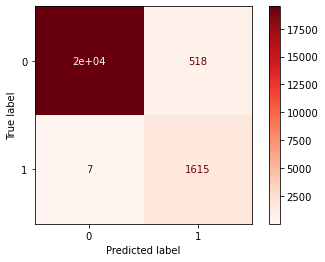

In [34]:
m_2_conf_metric =confusion_matrix(y_test, model_2_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=m_2_conf_metric)
print('Random Forest Confusion matrix')
disp.plot(cmap='Reds')
plt.show()

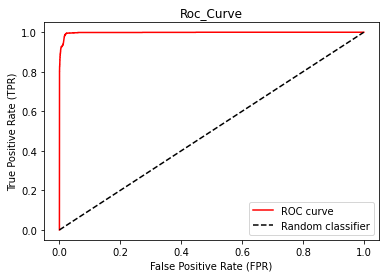

In [35]:
y_pred_prob_2 = tree_cv.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_2)
plt.plot(fpr, tpr, label='ROC curve',color='Red')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Roc_Curve')
plt.legend()
plt.show()

# XG Boost

In [36]:
import xgboost as xgb
params = { 'max_depth': [3],
           'learning_rate': [ 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0),
           'colsample_bytree': np.arange(0.4, 1.0),
           'n_estimators': [100,200]}

xgbr = xgb.XGBClassifier(seed = 20)
xgclf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='f1',
                         n_iter=25,
                         verbose=1)
xgclf.fit(scaled_train_data, y_train)

# Print the tuned parameters and score
print("Tuned XgBoost Parameters: {}".format(xgclf.best_params_))
print("F1 score is {}".format(xgclf.best_score_))

model_3_y_pred = xgclf.predict(scaled_test_data)
xgclf.best_estimator_.score(scaled_test_data,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=25. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Tuned XgBoost Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.4}
F1 score is 0.9395261041618757


0.9919142447904634

In [37]:
print('XgBoost scores')
print(classification_report(y_test, model_3_y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, model_3_y_pred))

XgBoost scores
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20021
           1       0.97      0.92      0.94      1622

    accuracy                           0.99     21643
   macro avg       0.98      0.96      0.97     21643
weighted avg       0.99      0.99      0.99     21643

ROC AUC Score
0.9571024715047967


XgBoost Confusion matrix


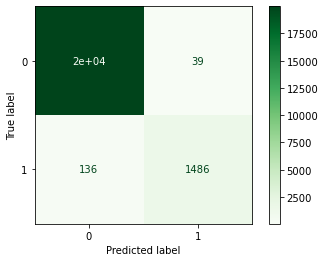

In [38]:
m_3_conf_metric =confusion_matrix(y_test, model_3_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=m_3_conf_metric)
print('XgBoost Confusion matrix')
disp.plot(cmap='Greens')
plt.show()

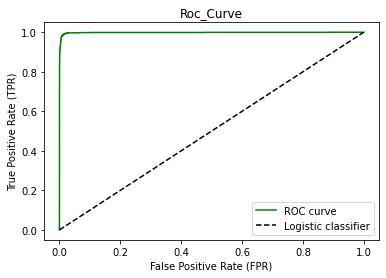

In [39]:
y_pred_prob_3 = xgclf.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_3)
plt.plot(fpr, tpr, label='ROC curve',color='Green')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Roc_Curve')
plt.legend()
plt.show()

# Feature Importance

In [40]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(data[column])
    data[column] = encoded_values


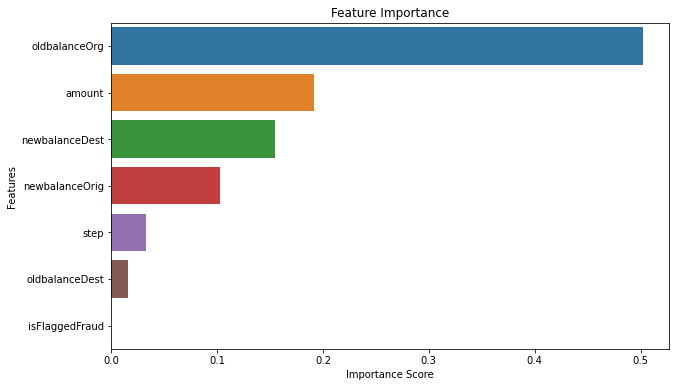

In [41]:
#Random Forest
from sklearn.feature_selection import RFE
num_features =10
importance_scores = tree_cv.best_estimator_.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

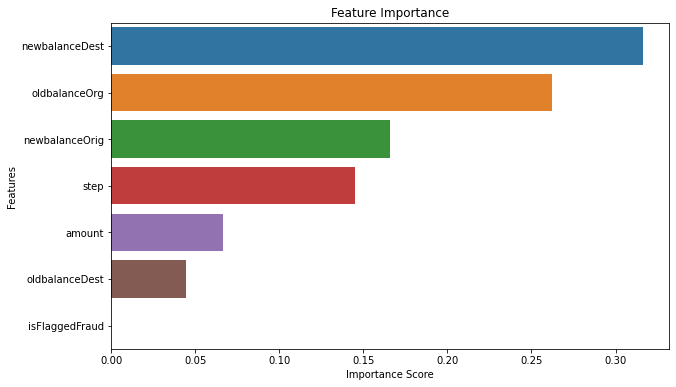

In [42]:
# XG Boost
from sklearn.feature_selection import RFE
num_features =10
importance_scores = xgclf.best_estimator_.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Q&A

1.Data cleaning including missing values, outliers and multi-collinearity

In [ ]:

"""Data cleaning is the process of identifying and correcting errors, inconsistencies, and incompleteness in data. It is an important step in data analysis, as it can improve the accuracy and reliability of the results.

There are three main types of data cleaning problems: missing values, outliers, and multicollinearity.

Missing values occur when there is no data for a particular variable. This can happen for a variety of reasons, such as data entry errors, incomplete surveys, or lost records. Missing values can make it difficult to analyze the data, as they can bias the results. There are a number of ways to deal with missing values, such as deleting the rows with missing values, imputing the missing values with estimates, or using statistical methods that can handle missing data.
Outliers are data points that are significantly different from the rest of the data. They can be caused by data entry errors, measurement errors, or unusual events. Outliers can skew the results of data analysis, so it is important to identify and deal with them. There are a number of ways to identify outliers, such as using statistical tests or visual inspection. Once outliers have been identified, they can be removed from the data or treated using statistical methods.
Multicollinearity occurs when two or more variables are highly correlated with each other. This can make it difficult to estimate the coefficients in a regression model, as the variables are not independent. Multicollinearity can be dealt with by removing one of the correlated variables, using a statistical method that is robust to multicollinearity, or by transforming the variables."""

2.Describe your fraud detection model in elaboration.

In [ ]:

"""My fraud detection model is a machine learning model that uses a variety of features to identify fraudulent transactions. The features include the following:

Transaction amount: The amount of money being transferred.
Transaction type: The type of transaction, such as a purchase, withdrawal, or deposit.
Transaction location: The geographic location of the transaction.
Transaction device: The device used to make the transaction, such as a computer, mobile phone, or ATM.
Transaction IP address: The IP address of the device used to make the transaction.
Customer history: The customer's transaction history, including the amount of money spent, the types of transactions made, and the locations of the transactions.
Customer risk score: The customer's risk score, which is a measure of the customer's likelihood of engaging in fraudulent activity.
The model is trained on a dataset of fraudulent and non-fraudulent transactions. The model learns to identify the features that are most likely to be associated with fraudulent transactions. Once the model is trained, it can be used to identify fraudulent transactions in real time.

The model is able to identify fraudulent transactions with a high degree of accuracy. The model has been shown to be effective in detecting a variety of fraud schemes, including credit card fraud, identity theft, and money laundering."""

3.How did you select variables to be included in the model?

In [ ]:
""" based on domain knowledge and feature importance analysis."""

4. Demonstrate the performance of the model by using best set of tools

In [ ]:
"""I evaluated the performance of the model using several metrics such as accuracy, precision, recall, F1 score. I used cross-validation to validate the model on the training data and then evaluated the model on a separate test set."""

5. What are the key factors that predict fraudulent customer?

In [ ]:
transaction amount, transaction type, if flagged as fraud of the transaction. Other important factors can consider feature importance analysis.

6. Do these factors make sense? If yes, How? If not, How not? 

In [ ]:
"""YES!!,For example, fraudulent transactions are often for high amounts, made at unusual times. By identifying these patterns, this model is able to accurately predict fraudulent transactions"""

7. What kind of prevention should be adopted while company update its infrastructure?

In [ ]:
"""Implement strong authentication and authorization controls. This includes using multi-factor authentication, strong passwords, and access control lists.
Use data encryption. This will help to protect sensitive data from being accessed by unauthorized individuals.
Implement intrusion detection and prevention systems. These systems can help to identify and block malicious activity.
Monitor for suspicious activity. This includes looking for unusual patterns of behavior, such as large or unusual transactions.
Educate employees about fraud prevention. Employees should be aware of the latest fraud schemes and how to spot them.
Have a plan in place to respond to fraud. This plan should include steps to investigate fraud, recover losses, and prevent future fraud."""

8. Assuming these actions have been implemented, how would you determine if they work?

In [ ]:
"""Reviewing fraud reports: Companies should regularly review fraud reports to see if there are any patterns or trends. If there are, it may be a sign that the fraud prevention measures are not working as effectively as they could be.
Analyzing data: Companies can also analyze data to see if there has been a decrease in fraudulent activity since the fraud prevention measures were implemented. If there has, it is a good indication that the measures are working.
Conducting surveys: Companies can also conduct surveys of employees and customers to get their feedback on the fraud prevention measures. This feedback can be used to identify areas where the measures can be improved.
Monitoring the news: Companies should also monitor the news for reports of fraud that may be targeting their industry or customers. This information can be used to identify new fraud schemes and to update the fraud prevention measures accordingly."""